In [83]:
! pip install -q gradio

In [84]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re

In [85]:
import gradio as gr

In [86]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report


In [87]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [88]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
df=pd.read_csv("https://raw.githubusercontent.com/AmenaNajeeb/SentimentAnalysisDT/main/sd_card.csv")#creating the data frame

In [90]:
df_train = pd.read_csv("https://raw.githubusercontent.com/AmenaNajeeb/SentimentAnalysisDT/main/sd_card.csv",delimiter=';',names=['review_content','rating'])
df_val = pd.read_csv("https://raw.githubusercontent.com/AmenaNajeeb/SentimentAnalysisDT/main/sd_card.csv",delimiter=';',names=['review_content','rating'])

In [91]:
df.shape

(4520, 3)

In [92]:
df.shape

(4520, 3)

In [93]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [94]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [95]:
import re
import string

In [96]:
def change_text(sentence):
    sentence=str(sentence)
    sentence=sentence.lower()  #convert into lower case
    cleantext = re.sub(re.compile('<.*?>'), ' ', sentence)
    cleantext=re.sub(r'\d+', '', cleantext) #remove numbers

    cleantext=re.sub(r'[^\w\s]', '', cleantext) #remove punctuations from text

    cleantext=" ".join(cleantext.split())  #remove whitespaces
    word_tokens = nltk.word_tokenize(cleantext)
    word_tokens=[wnl.lemmatize(word) for word in word_tokens if word not in stop_words]
    cleantext=" ".join(word_tokens)
    return cleantext

In [97]:
df['review_content']=df['review_content'].apply(change_text)

In [98]:
def removingoutof(ratings):
  ratings=re.sub('out of 5 stars',' ',ratings)
  ratings=int(float(ratings))
  return ratings

In [99]:
df['rating']=df['rating'].apply(removingoutof)

In [100]:
def sentrate(rating):#1 for negative rating, 2 for positive rating
  if(int(rating)==1or int(rating)==2 or int(rating)==3):
    return 1
  else:
    return 2

In [101]:
df['rating']=df['rating'].apply(sentrate)

In [102]:
df

,Unnamed: 0,review_content,rating
0,0,blazingly fast memory cardsee speed image atta...,2
1,1,totally worst experience amazonst one working ...,1
2,2,usage month card got write protected ive tried...,1
3,3,genuine samsung microsd card manufactured phil...,2
4,4,simply mind blowing product flawlessly recordi...,2
...,...,...,...
4515,4515,awesome word thisits high storage coping suppo...,2
4516,4516,good,2
4517,4517,good,2
4518,4518,good one,2


In [103]:
import seaborn as sns

<Axes: xlabel='rating', ylabel='count'>

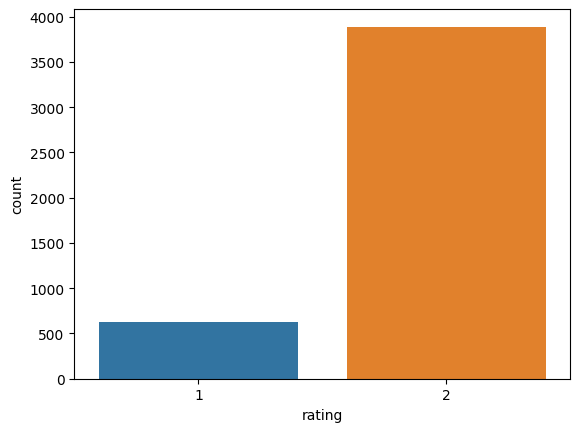

In [104]:
sns.countplot(x='rating',data=df)

In [105]:
import nltk

In [106]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [107]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

In [108]:
si=sia()

In [109]:
df['score']=df['review_content'].apply(lambda review_content:si.polarity_scores(review_content))

In [110]:
df['compound']=df['score'].apply(lambda score_dict:score_dict['compound'])
df.head()

,Unnamed: 0,review_content,rating,score,compound
0,0,blazingly fast memory cardsee speed image atta...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,1,totally worst experience amazonst one working ...,1,"{'neg': 0.284, 'neu': 0.545, 'pos': 0.171, 'co...",-0.6794
2,2,usage month card got write protected ive tried...,1,"{'neg': 0.31, 'neu': 0.556, 'pos': 0.134, 'com...",-0.5849
3,3,genuine samsung microsd card manufactured phil...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,4,simply mind blowing product flawlessly recordi...,2,"{'neg': 0.067, 'neu': 0.707, 'pos': 0.226, 'co...",0.9118


In [111]:
df['pos']=df['score'].apply(lambda score_dict:score_dict['pos'])
df['neg']=df['score'].apply(lambda score_dict:score_dict['neg'])


In [112]:
df['vader_prediction']=np.where(df['pos']>df['neg'],2,1)

target_names=['negative','positive']

In [113]:
df.drop(['rating','score','compound','pos','neg'], axis=1)


,Unnamed: 0,review_content,vader_prediction
0,0,blazingly fast memory cardsee speed image atta...,1
1,1,totally worst experience amazonst one working ...,1
2,2,usage month card got write protected ive tried...,1
3,3,genuine samsung microsd card manufactured phil...,1
4,4,simply mind blowing product flawlessly recordi...,2
...,...,...,...
4515,4515,awesome word thisits high storage coping suppo...,2
4516,4516,good,2
4517,4517,good,2
4518,4518,good one,2


In [114]:
df.head()

,Unnamed: 0,review_content,rating,score,compound,pos,neg,vader_prediction
0,0,blazingly fast memory cardsee speed image atta...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1
1,1,totally worst experience amazonst one working ...,1,"{'neg': 0.284, 'neu': 0.545, 'pos': 0.171, 'co...",-0.6794,0.171,0.284,1
2,2,usage month card got write protected ive tried...,1,"{'neg': 0.31, 'neu': 0.556, 'pos': 0.134, 'com...",-0.5849,0.134,0.310,1
3,3,genuine samsung microsd card manufactured phil...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1
4,4,simply mind blowing product flawlessly recordi...,2,"{'neg': 0.067, 'neu': 0.707, 'pos': 0.226, 'co...",0.9118,0.226,0.067,2


In [115]:
df.head(20)

,Unnamed: 0,review_content,rating,score,compound,pos,neg,vader_prediction
0,0,blazingly fast memory cardsee speed image atta...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1
1,1,totally worst experience amazonst one working ...,1,"{'neg': 0.284, 'neu': 0.545, 'pos': 0.171, 'co...",-0.6794,0.171,0.284,1
2,2,usage month card got write protected ive tried...,1,"{'neg': 0.31, 'neu': 0.556, 'pos': 0.134, 'com...",-0.5849,0.134,0.310,1
3,3,genuine samsung microsd card manufactured phil...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1
4,4,simply mind blowing product flawlessly recordi...,2,"{'neg': 0.067, 'neu': 0.707, 'pos': 0.226, 'co...",0.9118,0.226,0.067,2
5,5,unbelievable got malfunctioned week surprise i...,1,"{'neg': 0.075, 'neu': 0.721, 'pos': 0.204, 'co...",0.5106,0.204,0.075,2
6,6,expected speed slow usb port computer mbps wri...,1,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",0.6124,0.096,0.000,2
7,7,terrible time class transcend card new memory ...,2,"{'neg': 0.053, 'neu': 0.599, 'pos': 0.348, 'co...",0.9531,0.348,0.053,2
8,8,nothing sayonly wow speed amazing earlier usin...,2,"{'neg': 0.096, 'neu': 0.751, 'pos': 0.153, 'co...",0.2091,0.153,0.096,2
9,9,original samsung product samsung logo speed re...,2,"{'neg': 0.086, 'neu': 0.679, 'pos': 0.235, 'co...",0.7906,0.235,0.086,2


<Axes: xlabel='vader_prediction', ylabel='count'>

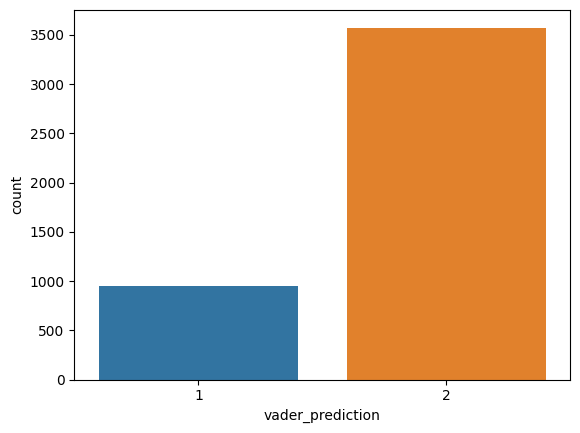

In [116]:
sns.countplot(x="vader_prediction",data=df)

In [117]:
lm = WordNetLemmatizer()

In [118]:
# def text_transformation(df_col):
#     corpus = []
#     for item in df_col:
#         new_item = re.sub('[^a-zA-Z]',' ',str(item))
#         new_item = new_item.lower()
#         new_item = new_item.split()
#         new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
#         corpus.append(' '.join(str(x) for x in new_item))
#     return corpus

In [119]:
# corpus = text_transformation(df['review_content'])

In [120]:
# corpus

In [121]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

In [122]:
# cv = CountVectorizer(ngram_range=(1,2))
# traindata = cv.fit_transform(corpus)
# X = traindata
# y = df.vader_prediction

In [123]:
# parameters = {'max_features': ('auto','sqrt'),
#              'n_estimators': [50, 100, 150],
#              'max_depth': [1, 2, None],
#              'min_samples_split': [1, 10, 15],
#              'min_samples_leaf': [1, 2, 5, 10],
#              'bootstrap': [True, False]}

In [124]:
# df.drop(df.tail(4219).index,
#         inplace = True)

In [125]:
# df.shape

In [126]:
# grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=2,return_train_score=True,n_jobs=-1)
# grid_search.fit(X,y)
# grid_search.best_params_

In [127]:
# df.shape

In [128]:
# for i in range(100):
#     print('Parameters: ',grid_search.cv_results_['params'][i])
#     print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])


In [129]:
# rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
#                                       max_depth=grid_search.best_params_['max_depth'],
#                                       n_estimators=grid_search.best_params_['n_estimators'],
#                                       min_samples_split=grid_search.best_params_['min_samples_split'],
#                                       min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
#                                       bootstrap=grid_search.best_params_['bootstrap'])
# rfc.fit(X,y)

In [130]:
# test_df = pd.read_csv('https://raw.githubusercontent.com/AmenaNajeeb/SentimentAnalysisDT/main/sd_card.csv',delimiter=';',names=['review_content','vader_prediction'])

In [131]:
# X_test,y_test = df.review_content,df.vader_prediction

# test_df = y_test

# test_corpus = text_transformation(X_test)
# #convert text data into vectors
# testdata = cv.transform(test_corpus)
# #predict the target
# predictions = rfc.predict(testdata)

In [132]:

# acc_score = accuracy_score(y_test,predictions)
# pre_score = precision_score(y_test,predictions)
# rec_score = recall_score(y_test,predictions)
# print('Accuracy_score: ',acc_score)
# print('Precision_score: ',pre_score)
# print('Recall_score: ',rec_score)
# print("-"*50)
# cr = classification_report(y_test,predictions)
# print(cr)

In [133]:
# def expression_check(prediction_input):
#     if prediction_input == 1:
#         print("Input statement has Negative Sentiment.")
#     else:
#        print("Input statement has Positive Sentiment.")

In [134]:
# def sentiment_predictor(input):
#     input = text_transformation(input)
#     transformed_input = cv.transform(input)
#     prediction = rfc.predict(transformed_input)
#     return expression_check(prediction)


GRADIO

In [135]:
! pip install gradio

In [136]:
import gradio as gr

In [137]:
import nltk

In [138]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [139]:
pip install vaderSentiment

In [140]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [141]:
def sentiment_scores(review):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(review)
  if sentiment['compound'] >= 0.05 :
        return("Positive review")
  elif sentiment['compound'] <= - 0.05 :
        return("Negative review")
  else :
        return("Neutral review")


In [142]:
rev=sentiment_scores("bad")

In [143]:
rev

'Negative review'

In [144]:
interface=gr.Interface(fn=sentiment_scores,inputs="text",outputs=['text'],title="SENTIMENT ANALYSIS OF SD CARD REVIEW")

In [145]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ec822613c34efd23eb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
